<a href="https://www.kaggle.com/code/natashabrando/a-jornada-do-profissional-de-dados?scriptVersionId=253703378" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **A Jornada do Profissional de Dados: Mapeando Transições de Carreira no Brasil**

<div align="center">
    <img src="https://raw.githubusercontent.com/Natashab-randao/Data-Hackers-Challenge/main/A%20Jornada%20do%20Profissional%20de%20Dados.png" width="800" alt="Capa da Análise: A Jornada do Profissional de Dados">
    <p style="font-size: 13px; font-style: italic; color: grey; text-align: center;">Imagem gerada por IA</p>
</div>

## 🗺️ **ETAPA 1: Planejamento Estratégico da Análise**

### **📋 Definição do Projeto**

**Título:** *"A Jornada do Profissional de Dados: Mapeando Transições de Carreira no Brasil"*

**Objetivo:** Descobrir os caminhos reais que levam profissionais ao mercado de dados, identificando padrões, tempos de transição e skills que realmente importam.

O mercado de dados no Brasil vive um momento de efervescência. Segundo a Brasscom (Associação das Empresas de Tecnologia da Informação e Comunicação e de Tecnologias Digitais), a demanda por novos talentos em tecnologia deve alcançar quase 800 mil profissionais até 2025, com as áreas de Big Data & Analytics e Inteligência Artificial entre as mais promissoras. Este cenário aquecido atrai profissionais de diversas origens, mas quais são os caminhos reais para o sucesso? De onde vêm esses talentos? Esta análise mergulha nos dados da pesquisa "State of Data 2024" para mapear as jornadas, identificar os perfis de transição mais comuns e descobrir os fatores que realmente impulsionam a carreira no vibrante ecossistema de dados brasileiro.

## 🔍 **ETAPA 2: Exploração Inicial dos Dados**

#### 💎 O Garimpo dos Dados: Desvendando a Matéria-Prima da Análise

Antes que os caminhos da "Jornada do Profissional de Dados" pudessem ser construídos, foi necessário garimpar a principal fonte de informações. Um dataset, em seu estado bruto, é como uma mina repleta de potencial, mas também de desafios. O primeiro passo consistiu em uma imersão nos dados para entender sua escala, encontrar as colunas que guardam as respostas para as perguntas do estudo e mapear as áreas que exigiriam mais atenção e limpeza.

Nesta etapa, o foco foi direcionado a responder três perguntas fundamentais:

1.  **Qual a dimensão da pesquisa?** A análise iniciou com uma visão geral, confirmando um universo de **5.217 respostas de profissionais**, distribuídas em **539 variáveis**. Isso estabelece uma base estatisticamente relevante para o estudo.

2.  **Onde estão as pistas sobre a carreira?** Foi realizada uma busca ativa por termos como "cargo", "salário" e "experiência". Este garimpo inicial permitiu a identificação das colunas cruciais que, mais tarde, foram utilizadas para a construção de features como `senioridade` e `perfil_transicao`.

3.  **Quais os desafios no caminho?** Nenhuma pesquisa é perfeita. A análise de dados faltantes (missings) revelou que informações importantes não estavam presentes em todos os registros, um desafio que precisou ser cuidadosamente endereçado na etapa subsequente de limpeza e preparação.

Com o mapa do tesouro em mãos e a ciência dos desafios, o projeto seguiu para a fase seguinte: a transformação dos dados brutos em insights poderosos.

In [1]:

# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Configurações visuais
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:

# 1. CARREGAMENTO DO DATASET
print("\n📊 1. CARREGANDO DATASET...")
df = pd.read_csv('/kaggle/input/state-of-data-brazil-20242025/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv',
                 encoding='utf-8',
                 sep=',',
                 engine='python',
                 quoting=3)

print(f"✅ Dataset carregado com sucesso!")
print(f"📏 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")

# 2. ESTRUTURA GERAL
print("\n🔍 2. ESTRUTURA GERAL DOS DADOS")
print("-" * 40)
print(f"Número total de respondentes: {len(df)}")
print(f"Número de variáveis: {len(df.columns)}")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



# 3. IDENTIFICAÇÃO DE VARIÁVEIS RELEVANTES
print("\n🎯 3. IDENTIFICANDO VARIÁVEIS PARA ANÁLISE DE TRANSIÇÃO")
print("-" * 50)

# Filtrar colunas por partes relevantes (estrutura real: "1.", "2.", etc.)
partes_relevantes = ['1.', '2.', '4.', '5.']  # Demografia, Carreira, Skills, Objetivos
colunas_relevantes = []

for parte in partes_relevantes:
    cols = [col for col in df.columns if col.startswith(parte)]
    colunas_relevantes.extend(cols)
    print(f"Parte {parte}: {len(cols)} variáveis")

print(f"\nTotal de variáveis relevantes: {len(colunas_relevantes)}")


# 4. PREVIEW DAS PRIMEIRAS VARIÁVEIS DE CADA PARTE
print("\n👀 4. PREVIEW DAS VARIÁVEIS POR PARTE")
print("-" * 40)

for parte in partes_relevantes:
    print(f"\n🔸 {parte} - Primeiras 5 variáveis:")
    cols_parte = [col for col in df.columns if col.startswith(parte)][:5]
    for col in cols_parte:
        valores_unicos = df[col].nunique()
        print(f"  {col}: {valores_unicos} valores únicos")


# 5. ANÁLISE DE MISSINGS
print("\n🔍 5. ANÁLISE DE DADOS FALTANTES")
print("-" * 35)

missing_info = df[colunas_relevantes].isnull().sum()
missing_percent = (missing_info / len(df)) * 100

missing_df = pd.DataFrame({
    'Variável': missing_info.index,
    'Missings': missing_info.values,
    'Percentual': missing_percent.values
}).sort_values('Percentual', ascending=False)

print("Top 10 variáveis com mais dados faltantes:")
print(missing_df.head(10).to_string(index=False))





📊 1. CARREGANDO DATASET...
✅ Dataset carregado com sucesso!
📏 Dimensões: 5217 linhas x 539 colunas

🔍 2. ESTRUTURA GERAL DOS DADOS
----------------------------------------
Número total de respondentes: 5217
Número de variáveis: 539
Memória utilizada: 119.61 MB

🎯 3. IDENTIFICANDO VARIÁVEIS PARA ANÁLISE DE TRANSIÇÃO
--------------------------------------------------
Parte 1.: 26 variáveis
Parte 2.: 40 variáveis
Parte 4.: 116 variáveis
Parte 5.: 4 variáveis

Total de variáveis relevantes: 186

👀 4. PREVIEW DAS VARIÁVEIS POR PARTE
----------------------------------------

🔸 1. - Primeiras 5 variáveis:
  1.a_idade: 49 valores únicos
  1.a.1_faixa_idade: 9 valores únicos
  1.b_genero: 4 valores únicos
  1.c_cor/raca/etnia: 7 valores únicos
  1.d_pcd: 3 valores únicos

🔸 2. - Primeiras 5 variáveis:
  2.a_situação_de_trabalho: 99 valores únicos
  2.b_setor: 88 valores únicos
  2.c_numero_de_funcionarios: 96 valores únicos
  2.d_atua_como_gestor: 97 valores únicos
  2.e_cargo_como_gestor: 87 

In [4]:

# 6. IDENTIFICAÇÃO DE VARIÁVEIS-CHAVE PARA TRANSIÇÃO
print("\n🎯 6. VARIÁVEIS-CHAVE IDENTIFICADAS")
print("-" * 40)

# Variáveis que provavelmente existem (baseado na estrutura do questionário)
variaveis_chave = {
    'Demografia': ['idade', 'genero', 'formacao', 'estado'],
    'Carreira': ['cargo', 'experiencia', 'salario', 'area_anterior'],
    'Skills': ['python', 'sql', 'machine_learning', 'estatistica'],
    'Transição': ['tempo_area', 'motivacao', 'desafios']
}

# Vamos buscar variáveis similares no dataset
print("🔍 Buscando variáveis similares no dataset:")
for categoria, vars_esperadas in variaveis_chave.items():
    print(f"\n{categoria}:")
    for var in vars_esperadas:
        cols_similares = [col for col in df.columns if var.lower() in col.lower()]
        if cols_similares:
            print(f"  ✅ {var}: {cols_similares[:3]}...")  # Mostrar até 3 matches
        else:
            print(f"  ❌ {var}: Não encontrada")

# FOCO ESPECIAL: ANÁLISE DETALHADA DA PARTE 2 (CARREIRA)
print("\n🎯 7. ANÁLISE DETALHADA - PARTE 2 (CARREIRA)")
print("-" * 50)

# Filtrar todas as colunas da Parte 2
colunas_carreira = [col for col in df.columns if col.startswith('2.')]
print(f"📊 Total de variáveis de carreira: {len(colunas_carreira)}")
print("\n🔍 Variáveis de carreira encontradas:")

for i, col in enumerate(colunas_carreira, 1):
    valores_unicos = df[col].nunique()
    print(f"  {i:2d}. {col}: {valores_unicos} valores únicos")

# Análise específica das primeiras variáveis de carreira
print(f"\n📋 PREVIEW DOS DADOS - PARTE 2:")
print("=" * 60)
if len(colunas_carreira) > 0:
    # Mostrar primeiras 3 linhas das primeiras 5 variáveis de carreira
    primeiras_carreira = colunas_carreira[:5]
    for col in primeiras_carreira:
        print(f"\n🔸 {col}:")
        valores_exemplo = df[col].value_counts().head(3)
        for valor, count in valores_exemplo.items():
            print(f"   {valor}: {count} ({count/len(df)*100:.1f}%)")
else:
    print("❌ Nenhuma variável de carreira encontrada com prefixo '2.'")

# BUSCA INTELIGENTE DE VARIÁVEIS-CHAVE
print("\n🔍 8. BUSCA INTELIGENTE DE VARIÁVEIS-CHAVE")
print("-" * 50)

# Palavras-chave para buscar variáveis importantes
palavras_chave = {
    'Idade': ['idade', 'age'],
    'Salário': ['salario', 'remuneracao', 'renda'],
    'Cargo': ['cargo', 'funcao', 'posicao'],
    'Experiência': ['experiencia', 'tempo', 'anos'],
    'Formação': ['formacao', 'educacao', 'graduacao'],
    'Estado': ['estado', 'regiao', 'cidade'],
    'Área Anterior': ['anterior', 'origem', 'transicao']
}

print("🎯 Mapeamento de variáveis por categoria:")
for categoria, keywords in palavras_chave.items():
    print(f"\n{categoria}:")
    encontradas = []
    for keyword in keywords:
        cols_match = [col for col in df.columns if keyword in col.lower()]
        encontradas.extend(cols_match)
    
    # Remover duplicatas e mostrar até 3
    encontradas = list(set(encontradas))[:3]
    if encontradas:
        for col in encontradas:
            print(f"  ✅ {col}")
    else:
        print(f"  ❌ Nenhuma variável encontrada")

print("\n" + "="*60)
print("✅ ETAPA 2 CONCLUÍDA!")
print("📋 Próximos passos:")
print("   1. Analisar distribuições das variáveis identificadas")
print("   2. Fazer limpeza e tratamento dos dados")  
print("   3. Criar variáveis derivadas para análise de transição")
print("   4. Focar nas variáveis de carreira da Parte 2")
print("="*60)



🎯 6. VARIÁVEIS-CHAVE IDENTIFICADAS
----------------------------------------
🔍 Buscando variáveis similares no dataset:

Demografia:
  ✅ idade: ['1.a_idade', '1.a.1_faixa_idade', ' devido a minha identidade de gênero"']...
  ✅ genero: ['1.b_genero']...
  ✅ formacao: ['1.j_vive_no_estado_de_formacao']...
  ✅ estado: ['1.i_estado_onde_mora', '1.j_vive_no_estado_de_formacao', '1.k_estado_de_origem']...

Carreira:
  ✅ cargo: ['2.e_cargo_como_gestor', '2.f_cargo_atual', '3.b_cargos_no_time_de_dados_da_empresa']...
  ✅ experiencia: ['1.e_experiencia_profissional_prejudicada', '2.i_tempo_de_experiencia_em_dados', '2.j_tempo_de_experiencia_em_ti']...
  ❌ salario: Não encontrada
  ❌ area_anterior: Não encontrada

Skills:
  ✅ python: ['4.d.3_Python', '"6.a.1_Desenvolvo pipelines de dados utilizando linguagens de programação como Python', '6.b.1_Scripts Python']...
  ✅ sql: ['4.b.1_Dados relacionais (estruturados em bancos SQL)', '4.b.2_Dados armazenados em bancos NoSQL', '4.c.1_Dados relacionais

Para iniciar a exploração, foi feita uma avaliação geral da escala e complexidade do dataset. Os números-chave são apresentados abaixo:

---
<table style="width:100%; border:0px;">
    <tr style="border:0px;">
        <td style="width:33%; text-align:center; border:0px;">
            <p style="font-size: 36px; margin: 0; line-height: 1;">👥</p>
            <p style="font-size: 32px; font-weight: bold; margin: 5px 0;">5.217</p>
            <p style="font-size: 16px; margin: 0;">Respondentes</p>
        </td>
        <td style="width:33%; text-align:center; border:0px;">
            <p style="font-size: 36px; margin: 0; line-height: 1;">📋</p>
            <p style="font-size: 32px; font-weight: bold; margin: 5px 0;">539</p>
            <p style="font-size: 16px; margin: 0;">Variáveis Originais</p>
        </td>
        <td style="width:33%; text-align:center; border:0px;">
            <p style="font-size: 36px; margin: 0; line-height: 1;">✨</p>
            <p style="font-size: 32px; font-weight: bold; margin: 5px 0;">10+</p>
            <p style="font-size: 16px; margin: 0;">Features Criadas</p>
        </td>
    </tr>
</table>

---

### Garimpando as Variáveis-Chave: A Descoberta Crítica

A exploração inicial do dataset foi um verdadeiro trabalho de detetive. Com mais de 500 variáveis, a primeira tarefa foi identificar as colunas que continham as informações essenciais sobre demografia, carreira e skills.

*   **O Desafio Inicial:** As buscas iniciais por palavras-chave como "salário" ou "experiência" produziram resultados mistos ou enganosos. Isso indicou que os nomes das colunas não eram literais, exigindo uma investigação mais profunda sobre o *conteúdo* de cada variável.

*   **O "Momento Eureka" na Parte 2:** A análise revelou que o **bloco "2" do questionário**, dedicado à carreira, era a mina de ouro da nossa análise. Foi aqui que uma descoberta crucial foi feita: o conteúdo das colunas era mais importante que seus nomes. Por exemplo:
    *   A variável `2.c_numero_de_funcionarios` na verdade continha as **faixas salariais**.
    *   A variável `2.b_setor` continha os **níveis de senioridade** (Júnior, Pleno, Sênior).
    *   As variáveis `2.d_atua_como_gestor` e `2.e_cargo_como_gestor` continham as informações sobre **tempo de experiência** em dados e TI, respectivamente.

*   **O Resultado:** Esta descoberta foi a fundação para toda a Etapa 3 (Engenharia de Features), permitindo o mapeamento correto e a criação de variáveis derivadas precisas e confiáveis, como `nivel_salarial` e `experiencia_total`.

Com as variáveis-chave devidamente identificadas e validadas, o caminho estava livre para a fase de limpeza e enriquecimento dos dados.

In [ ]:

df.head()

## 🏗️ ETAPA 3: Construindo os Pilares da Análise - A Alquimia da Engenharia de Features

Um dado bruto raramente conta uma história por si só. A verdadeira mágica da ciência de dados acontece na transformação: a alquimia de converter informações brutas e dispersas em pilares sólidos e significativos sobre os quais toda a análise se apoiará. Esta representa a fase mais crucial do projeto, onde as imperfeições dos dados são tratadas e, mais importante, são criadas as lentes através das quais se pode enxergar a "Jornada do Profissional de Dados".

A estratégia de preparação concentrou-se em dois eixos principais:

1.  **Preservação Inteligente da Informação:** Diante de dados faltantes — uma realidade em qualquer pesquisa —, a opção foi por não descartar valiosos respondentes. Em vez disso, foram criadas categorias como **"Não Informado"**. Essa abordagem não apenas manteve a robustez da amostra, mas também abriu a possibilidade de se investigar se o ato de não responder estava correlacionado a algum perfil específico.

2.  **A Criação de Variáveis-Chave:** O verdadeiro salto de qualidade proveio da engenharia de features, processo no qual foram construídas as variáveis que tornaram a análise possível:
    *   **Experiência Quantificada (`experiencia_total`):** Faixas de texto como "de 1 a 2 anos" foram convertidas em valores numéricos, permitindo cálculos e comparações diretas.
    *   **Senioridade Calculada (`senioridade_calculada`):** Com base na experiência quantificada, foi criado um indicador de maturidade profissional, essencial para entender a progressão na carreira.
    *   **O DNA da Transição (`perfil_transicao`):** A principal feature do estudo, que classifica cada profissional em uma jornada de carreira específica ("Nativo em Dados", "Migrante de TI", "Veterano Híbrido"), permitindo a comparação entre as diferentes rotas para o sucesso.
    *   **Ordem nos Cargos (`cargo_simplificado`):** Dezenas de títulos de trabalho distintos foram agrupados em categorias claras e consistentes ("Analista de Dados", "Engenheiro de Dados", etc.), trazendo clareza à análise de funções.

Com estes pilares sólidos construídos e as ferramentas de análise forjadas, o projeto estava finalmente pronto para a fase mais aguardada: a visualização dos padrões e a extração de insights sobre a jornada dos profissionais de dados no Brasil.

In [6]:

# Visualizar colunas que mencionam "estatística"
estat_cols = [col for col in df.columns if "estat" in col.lower()]
for col in estat_cols:
    print(col)
    

"7.a.5_Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese
"7.a.9_Utilizo ferramentas avançadas de estatística como SAS
"7.d.5_Realizando experimentos e estudos utilizando metodologias estatísticas como teste de hipótese
"7.d.9_Utilizando ferramentas avançadas de estatística como SAS
"8.a.8_Utilizo ferramentas avançadas de estatística como SAS
8.b.4_Utilizo métodos estatísticos Bayesianos para analisar dados.
"8.b.6_Utilizo métodos estatísticos clássicos (Testes de hipótese
 inferência estatistica) para analisar dados."
"8.c.11_Ferramentas de estatística avançada como SPSS
"8.d.8_Utilizando ferramentas avançadas de estatística como SAS


In [7]:


# ETAPA 3 Parte 1 — CRIAÇÃO DE VARIÁVEIS DERIVADAS

import pandas as pd
import numpy as np

# =============================
# 1. MAPEAMENTO DAS EXPERIÊNCIAS (de texto para número estimado)
# =============================
experiencia_map = {
    'Menos de 1 ano': 0.5,
    'De 1 a 2 anos': 1.5,
    'de 1 a 2 anos': 1.5,
    'de 3 a 4 anos': 3.5,
    'de 5 a 6 anos': 5.5,
    'de 7 a 10 anos': 8.5,
    'Mais de 10 anos': 12,
    'Não tenho experiência na área de dados': 0,
    'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados': 0
}

# Certificondo de que os valores estão limpos antes de mapear
df['2.i_tempo_de_experiencia_em_dados'] = df['2.i_tempo_de_experiencia_em_dados'].astype(str).str.strip()
df['2.j_tempo_de_experiencia_em_ti'] = df['2.j_tempo_de_experiencia_em_ti'].astype(str).str.strip()

# Criar colunas numéricas a partir das textuais
df['exp_dados_num'] = df['2.i_tempo_de_experiencia_em_dados'].map(experiencia_map)
df['exp_ti_num'] = df['2.j_tempo_de_experiencia_em_ti'].map(experiencia_map)

# =============================
# 2. EXPERIÊNCIA TOTAL (TI + Dados)
# =============================
df['experiencia_total'] = df[['exp_dados_num', 'exp_ti_num']].sum(axis=1, skipna=True)

# =============================
# 3. SENIORIDADE ESTIMADA
# =============================
def estimar_senioridade(x):
    if pd.isna(x):
        return 'Desconhecido'
    elif x < 2:
        return 'Júnior'
    elif x < 5:
        return 'Pleno'
    else:
        return 'Sênior'

df['senioridade_estimada'] = df['experiencia_total'].apply(estimar_senioridade)

# =============================
# 4. PERFIL DE TRANSIÇÃO
# =============================
def classificar_transicao(row):
    dados = row['exp_dados_num']
    ti = row['exp_ti_num']
    
    if pd.isna(dados) or pd.isna(ti):
        return 'Desconhecido'
    if ti >= 5 and dados < 2:
        return 'Migrante de TI'
    if ti < 2 and dados >= 2:
        return 'Nativo em Dados'
    if ti >= 5 and dados >= 3:
        return 'Veterano Analítico'
    return 'Transição Incerta'

df['perfil_transicao'] = df.apply(classificar_transicao, axis=1)

# =============================
# 5. FLAG DE SKILLS TÉCNICAS
# =============================

# Colunas confirmadas do dataset (sem aspas duplicadas no início)
colunas_estatistica = [
    '7.a.5_Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese',
    '7.a.9_Utilizo ferramentas avançadas de estatística como SAS',
    '7.d.5_Realizando experimentos e estudos utilizando metodologias estatísticas como teste de hipótese',
    '7.d.9_Utilizando ferramentas avançadas de estatística como SAS',
    '8.a.8_Utilizo ferramentas avançadas de estatística como SAS',
    '8.c.11_Ferramentas de estatística avançada como SPSS',
    '8.d.8_Utilizando ferramentas avançadas de estatística como SAS'
]

# Garante que todas as colunas existam
colunas_estatistica_existentes = [col for col in colunas_estatistica if col in df.columns]

# Criar a flag: se responder "Sim" em qualquer uma dessas colunas
df['tem_estatistica'] = df[colunas_estatistica_existentes].apply(
    lambda row: any(x == 'Sim' for x in row), axis=1
).astype(int)

# Python e SQL
df['tem_python'] = df['4.d.3_Python'].astype(str).str.strip().str.lower().map({'sim': 1, 'não': 0})
df['tem_sql'] = df['4.b.1_Dados relacionais (estruturados em bancos SQL)'].astype(str).map({'Sim': 1, 'Não': 0})

# =============================
# 6. CODIFICAÇÃO DE FAIXA SALARIAL (ordem crescente)
# =============================
salario_map = {
    'Até R$1.000/mês': 1,
    'De R$1.001/mês a R$2.000/mês': 2,
    'De R$2.001/mês a R$3.000/mês': 3,
    'De R$3.001/mês a R$4.000/mês': 4,
    'De R$4.001/mês a R$5.000/mês': 5,
    'De R$5.001/mês a R$6.000/mês': 6,
    'De R$6.001/mês a R$8.000/mês': 7,
    'De R$8.001/mês a R$12.000/mês': 8,
    'De R$12.001/mês a R$16.000/mês': 9,
    'Acima de R$16.000/mês': 10
}

df['2.h_faixa_salarial'] = df['2.h_faixa_salarial'].astype(str).str.strip()
df['nivel_salarial'] = df['2.h_faixa_salarial'].map(salario_map)

# =============================
# 7. VISÃO GERAL DAS NOVAS VARIÁVEIS
# =============================
print("✅ Variáveis derivadas criadas com sucesso!")
print(df[['experiencia_total', 'senioridade_estimada', 'perfil_transicao', 'nivel_salarial']].head(15))


✅ Variáveis derivadas criadas com sucesso!
    experiencia_total senioridade_estimada perfil_transicao  nivel_salarial
0                 0.0               Júnior     Desconhecido             NaN
1                 0.0               Júnior     Desconhecido             NaN
2                 0.0               Júnior     Desconhecido             NaN
3                 0.0               Júnior     Desconhecido             NaN
4                 0.0               Júnior     Desconhecido             NaN
5                 0.0               Júnior     Desconhecido             NaN
6                 0.0               Júnior     Desconhecido             NaN
7                 0.0               Júnior     Desconhecido             NaN
8                 0.0               Júnior     Desconhecido             NaN
9                 0.0               Júnior     Desconhecido             NaN
10                0.0               Júnior     Desconhecido             NaN
11                0.0               Júnior   

In [8]:


print(df['2.i_tempo_de_experiencia_em_dados'].unique())
print(df['2.j_tempo_de_experiencia_em_ti'].unique())
df['2.h_faixa_salarial'].unique()

[col for col in df.columns if 'experiencia' in col.lower()]


['nan' '0' 'TRUE' 'Menos de 1 ano' 'de 1 a 2 anos' '1' 'Júnior'
 'de 3 a 4 anos' 'FALSE'
 'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados'
 'de R$ 1.001/mês a R$ 2.000/mês' 'Acima de 3.000'
 'Não tenho experiência na área de dados' 'de R$ 2.001/mês a R$ 3.000/mês'
 'de R$ 4.001/mês a R$ 6.000/mês' 'Setor Público'
 'Analista de Dados/Data Analyst' 'Pleno' 'de 11 a 50'
 'Analytics Engineer' 'de 1.001 a 3.000' 'de 5 a 6 anos'
 'de R$ 6.001/mês a R$ 8.000/mês' 'Freelancer' 'de 7 a 10 anos' 'de 1 a 5'
 'Empregado (CLT)' 'de R$ 3.001/mês a R$ 4.000/mês'
 'de R$ 8.001/mês a R$ 12.000/mês' 'Mais de 10 anos' 'Área de Consultoria'
 'Mestrado' 'de R$ 12.001/mês a R$ 16.000/mês'
 'Engenheiro de Dados/Data Engineer/Data Architect' 'de 501 a 1.000'
 'Sênior' 'Outra Opção' 'de R$ 16.001/mês a R$ 20.000/mês' 'Pós-graduação'
 'de 101 a 500'
 'Outras Engenharias (não incluir engenharia de software ou TI)'
 'Cientista de Dados/Data Scientist' 'Indú

['1.e_experiencia_profissional_prejudicada',
 '2.i_tempo_de_experiencia_em_dados',
 '2.j_tempo_de_experiencia_em_ti',
 '5.d_experiencia_em_processos_seletivos',
 'experiencia_total']

In [9]:


# ETAPA 3 — Parte 2: Limpeza de Dados Faltantes

# 🔍 INVESTIGAÇÃO PROFUNDA - ENCONTRAR OS DADOS CORRETOS

import pandas as pd
import numpy as np

print("🔍 INVESTIGAÇÃO PROFUNDA DO DATASET")
print("="*60)

# 1. BUSCAR TODAS AS VARIÁVEIS QUE CONTENHAM PALAVRAS-CHAVE ESPECÍFICAS
print("\n1. BUSCA POR VARIÁVEIS DE EXPERIÊNCIA/TEMPO:")
print("-"*50)

# Buscar por palavras relacionadas a tempo/experiência
palavras_tempo = ['tempo', 'experiencia', 'anos', 'ano', 'meses']
colunas_tempo = []

for palavra in palavras_tempo:
    cols = [col for col in df.columns if palavra.lower() in col.lower()]
    colunas_tempo.extend(cols)

# Remover duplicatas
colunas_tempo = list(set(colunas_tempo))
print(f"Variáveis relacionadas a tempo/experiência: {len(colunas_tempo)}")

for col in colunas_tempo:
    print(f"  - {col}")
    # Mostrar alguns valores únicos
    valores = df[col].value_counts().head(3)
    print(f"    Top 3 valores: {list(valores.index)}")
    print()

# 2. BUSCAR VARIÁVEIS COM FAIXAS SALARIAIS TEXTUAIS
print("\n2. BUSCA POR PADRÕES DE SALÁRIO:")
print("-"*40)

# Buscar em todas as colunas por padrões de salário
colunas_com_salario = []
for col in df.columns:
    # Verificar se alguma linha contém padrão de salário
    amostra = df[col].astype(str).head(100)
    if any('R$' in str(val) and 'mês' in str(val) for val in amostra):
        colunas_com_salario.append(col)

print(f"Colunas que contêm padrões de salário: {len(colunas_com_salario)}")
for col in colunas_com_salario:
    print(f"  - {col}")
    # Mostrar valores com padrão de salário
    valores_salario = df[col].astype(str)
    valores_salario = valores_salario[valores_salario.str.contains('R\\$', na=False)]
    print(f"    Exemplos: {list(valores_salario.head(3))}")
    print()

# 3. INVESTIGAR PADRÕES NAS COLUNAS DA PARTE 2
print("\n3. ANÁLISE DETALHADA DA PARTE 2:")
print("-"*40)

parte2_cols = [col for col in df.columns if col.startswith('2.')]
print(f"Total de colunas da Parte 2: {len(parte2_cols)}")

for col in parte2_cols:
    valores_unicos = df[col].nunique()
    valores_nao_nan = df[col][df[col].astype(str) != 'nan']
    
    if len(valores_nao_nan) > 0:
        print(f"\n🔸 {col}:")
        print(f"   Valores únicos: {valores_unicos}")
        print(f"   Dados válidos: {len(valores_nao_nan)} ({len(valores_nao_nan)/len(df)*100:.1f}%)")
        
        # Mostrar alguns valores válidos
        valores_exemplo = valores_nao_nan.value_counts().head(5)
        print("   Top 5 valores:")
        for valor, count in valores_exemplo.items():
            print(f"     '{valor}': {count}")

# 4. BUSCAR VARIÁVEIS COM CATEGORIAS DE EXPERIÊNCIA TEXTUAIS
print("\n4. BUSCA POR CATEGORIAS DE EXPERIÊNCIA:")
print("-"*45)

# Padrões típicos de categorias de experiência
padroes_exp = ['menos de', 'de 1 a', 'de 3 a', 'de 5 a', 'mais de', 'anos']

colunas_exp_categoricas = []
for col in df.columns:
    amostra = df[col].astype(str).head(200)
    if any(any(padrao in str(val).lower() for padrao in padroes_exp) for val in amostra):
        colunas_exp_categoricas.append(col)

print(f"Colunas com categorias de experiência: {len(colunas_exp_categoricas)}")
for col in colunas_exp_categoricas:
    print(f"\n  - {col}")
    valores_exp = df[col].astype(str)
    valores_exp = valores_exp[valores_exp.str.contains('de.*a.*anos|menos de|mais de', na=False, case=False)]
    if len(valores_exp) > 0:
        print(f"    Exemplos: {list(valores_exp.head(3))}")

# 5. INVESTIGAR ESTRUTURA ESPECÍFICA - PARTE 2
print("\n5. INVESTIGAÇÃO ESPECÍFICA - ESTRUTURA DA PARTE 2:")
print("-"*55)

# Verificar se há padrão na numeração das colunas
import re

for col in parte2_cols[:15]:  # Primeiros 15 para não sobrecarregar
    print(f"\n🔸 {col}:")
    
    # Contar tipos de dados
    dados_validos = df[col][df[col].astype(str) != 'nan']
    if len(dados_validos) > 0:
        # Identificar padrões nos dados
        sample = dados_validos.head(10).astype(str).tolist()
        print(f"   Amostra: {sample}")
        
        # Verificar se contém números
        tem_numeros = any(re.search(r'\d', str(val)) for val in sample)
        # Verificar se contém R$
        tem_salario = any('R$' in str(val) for val in sample)
        # Verificar se contém anos
        tem_anos = any('anos' in str(val) for val in sample)
        
        caracteristicas = []
        if tem_numeros: caracteristicas.append("números")
        if tem_salario: caracteristicas.append("salário")
        if tem_anos: caracteristicas.append("tempo")
        
        if caracteristicas:
            print(f"   Características: {', '.join(caracteristicas)}")




🔍 INVESTIGAÇÃO PROFUNDA DO DATASET

1. BUSCA POR VARIÁVEIS DE EXPERIÊNCIA/TEMPO:
--------------------------------------------------
Variáveis relacionadas a tempo/experiência: 14
  - experiencia_total
    Top 3 valores: [0.0, 3.5, 1.5]

  - 8.d_maior_tempo_gasto_como_ds
    Top 3 valores: [' APIs de consumo e monitoramento."', '1', '0']

  - 8.b.4_Utilizo métodos estatísticos Bayesianos para analisar dados.
    Top 3 valores: ['0', '1', ' Plataformas de Data Apps (Streamlit']

  - 3.d.14_Dividir o tempo entre entregas técnicas e gestão
    Top 3 valores: ['0', '1', ' Gerenciar a expectativa das áreas de negócio em relação as entregas das equipes de dados."']

  - 2.j_tempo_de_experiencia_em_ti
    Top 3 valores: ['nan', '0', '1']

  - 2.i_tempo_de_experiencia_em_dados
    Top 3 valores: ['nan', '0', 'TRUE']

  - 7.d_maior_tempo_gasto_como_da
    Top 3 valores: ['0', '1', '"Utilizo modelos de regressão (linear']

  - 5.d_experiencia_em_processos_seletivos
    Top 3 valores: ['0', '1', '

In [10]:



# 🎯 ETAPA 3 CORRIGIDA - CRIAÇÃO DE VARIÁVEIS DERIVADAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("🚀 ETAPA 3: CRIAÇÃO DE VARIÁVEIS DERIVADAS")
print("=" * 60)

# =============================
# 1. MAPEAMENTO CORRETO DAS VARIÁVEIS
# =============================

print("\n1. MAPEAMENTO DAS VARIÁVEIS CORRETAS:")
print("-" * 45)

# Variáveis corretas identificadas
variaveis_corretas = {
    'cargo': '2.a_situação_de_trabalho',           # Analista de Dados, Cientista, etc.
    'nivel': '2.b_setor',                          # Júnior, Pleno, Sênior
    'salario': '2.c_numero_de_funcionarios',       # Faixas salariais
    'exp_dados': '2.d_atua_como_gestor',          # Experiência em dados
    'exp_ti': '2.e_cargo_como_gestor'             # Experiência em TI
}

for categoria, coluna in variaveis_corretas.items():
    print(f"✅ {categoria}: {coluna}")

# =============================
# 2. LIMPEZA E PREPARAÇÃO DOS DADOS
# =============================

print(f"\n2. LIMPEZA DOS DADOS:")
print("-" * 25)

# Copiar colunas com nomes mais limpos
df['cargo_atual'] = df['2.a_situação_de_trabalho'].copy()
df['nivel_atual'] = df['2.b_setor'].copy()
df['faixa_salarial'] = df['2.c_numero_de_funcionarios'].copy()
df['experiencia_dados_texto'] = df['2.d_atua_como_gestor'].copy()
df['experiencia_ti_texto'] = df['2.e_cargo_como_gestor'].copy()

# Remover valores NaN e converter para string para limpeza
for col in ['cargo_atual', 'nivel_atual', 'faixa_salarial', 'experiencia_dados_texto', 'experiencia_ti_texto']:
    df[col] = df[col].astype(str).replace('nan', np.nan)

print("✅ Variáveis copiadas e limpas")

# =============================
# 3. MAPEAMENTO DE EXPERIÊNCIA PARA NÚMEROS
# =============================

print(f"\n3. MAPEAMENTO DE EXPERIÊNCIA:")
print("-" * 35)

# Mapeamento de experiência
experiencia_map = {
    'Não tenho experiência na área de dados': 0,
    'Menos de 1 ano': 0.5,
    'de 1 a 2 anos': 1.5,
    'de 3 a 4 anos': 3.5,
    'de 5 a 6 anos': 5.5,
    'de 7 a 10 anos': 8.5,
    'Mais de 10 anos': 12,
    'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados': 0
}

# Aplicar mapeamento
df['exp_dados_num'] = df['experiencia_dados_texto'].map(experiencia_map)
df['exp_ti_num'] = df['experiencia_ti_texto'].map(experiencia_map)

# Verificar resultados
dados_validos_dados = df['exp_dados_num'].notna().sum()
dados_validos_ti = df['exp_ti_num'].notna().sum()

print(f"✅ Experiência em dados mapeada: {dados_validos_dados} valores válidos")
print(f"✅ Experiência em TI mapeada: {dados_validos_ti} valores válidos")

# =============================
# 4. EXPERIÊNCIA TOTAL E SENIORIDADE
# =============================

print(f"\n4. CÁLCULO DE EXPERIÊNCIA TOTAL:")
print("-" * 40)

# Experiência total (soma das duas, tratando NaN)
df['experiencia_total'] = df[['exp_dados_num', 'exp_ti_num']].sum(axis=1, skipna=True)

# Para casos onde ambas são NaN, colocar NaN
mask_ambas_nan = df[['exp_dados_num', 'exp_ti_num']].isna().all(axis=1)
df.loc[mask_ambas_nan, 'experiencia_total'] = np.nan

# Senioridade baseada na experiência total
def calcular_senioridade(exp_total):
    if pd.isna(exp_total):
        return 'Não Informado'
    elif exp_total == 0:
        return 'Iniciante'
    elif exp_total < 2:
        return 'Júnior'
    elif exp_total < 5:
        return 'Pleno'
    else:
        return 'Sênior'

df['senioridade_calculada'] = df['experiencia_total'].apply(calcular_senioridade)

print(f"✅ Experiência total calculada")
print(f"✅ Senioridade estimada criada")

# =============================
# 5. PERFIL DE TRANSIÇÃO DE CARREIRA
# =============================

print(f"\n5. CLASSIFICAÇÃO DE PERFIS DE TRANSIÇÃO:")
print("-" * 50)

def classificar_perfil_transicao(row):
    exp_dados = row['exp_dados_num']
    exp_ti = row['exp_ti_num']
    
    if pd.isna(exp_dados) or pd.isna(exp_ti):
        return 'Não Informado'
    
    # Lógica de classificação
    if exp_ti == 0 and exp_dados == 0:
        return 'Iniciante Total'
    elif exp_ti == 0 and exp_dados > 0:
        return 'Nativo em Dados'
    elif exp_ti > 0 and exp_dados <= 2:
        return 'Migrante de TI'
    elif exp_ti >= 3 and exp_dados >= 3:
        return 'Veterano Híbrido'
    else:
        return 'Perfil Misto'

df['perfil_transicao'] = df.apply(classificar_perfil_transicao, axis=1)

print("✅ Perfis de transição classificados")

# =============================
# 6. PROCESSAMENTO DE SALÁRIOS
# =============================

print(f"\n6. PROCESSAMENTO DE FAIXAS SALARIAIS:")
print("-" * 45)

# Mapeamento de faixas salariais
salario_ordem = {
    'Menos de R$ 1.000/mês': 1,
    'de R$ 1.001/mês a R$ 2.000/mês': 2,
    'de R$ 2.001/mês a R$ 3.000/mês': 3,
    'de R$ 3.001/mês a R$ 4.000/mês': 4,
    'de R$ 4.001/mês a R$ 6.000/mês': 5,
    'de R$ 6.001/mês a R$ 8.000/mês': 6,
    'de R$ 8.001/mês a R$ 12.000/mês': 7,
    'de R$ 12.001/mês a R$ 16.000/mês': 8,
    'de R$ 16.001/mês a R$ 20.000/mês': 9,
    'Acima de R$ 20.000/mês': 10
}

df['nivel_salarial'] = df['faixa_salarial'].map(salario_ordem)

salarios_validos = df['nivel_salarial'].notna().sum()
print(f"✅ Faixas salariais processadas: {salarios_validos} valores válidos")

# =============================
# 7. LIMPEZA DE CARGOS
# =============================

print(f"\n7. PROCESSAMENTO DE CARGOS:")
print("-" * 35)

# Simplificar nomes de cargos
def simplificar_cargo(cargo):
    if pd.isna(cargo):
        return 'Não Informado'
    
    cargo_str = str(cargo).lower()
    
    if 'analista de dados' in cargo_str or 'data analyst' in cargo_str:
        return 'Analista de Dados'
    elif 'cientista de dados' in cargo_str or 'data scientist' in cargo_str:
        return 'Cientista de Dados'
    elif 'engenheiro de dados' in cargo_str or 'data engineer' in cargo_str:
        return 'Engenheiro de Dados'
    elif 'analista de bi' in cargo_str or 'bi analyst' in cargo_str:
        return 'Analista de BI'
    elif 'desenvolvedor' in cargo_str or 'engenheiro de software' in cargo_str:
        return 'Desenvolvedor/Engenheiro'
    else:
        return 'Outros'

df['cargo_simplificado'] = df['cargo_atual'].apply(simplificar_cargo)

print("✅ Cargos simplificados")

# =============================
# 8. VALIDAÇÃO E RESUMO FINAL
# =============================

print(f"\n8. RESUMO DAS VARIÁVEIS CRIADAS:")
print("-" * 45)

# Contar valores válidos para cada variável criada
variaveis_criadas = {
    'experiencia_total': 'Experiência total (anos)',
    'senioridade_calculada': 'Senioridade calculada',
    'perfil_transicao': 'Perfil de transição',
    'nivel_salarial': 'Nível salarial',
    'cargo_simplificado': 'Cargo simplificado'
}

for var, descricao in variaveis_criadas.items():
    validos = df[var].notna().sum()
    pct = (validos / len(df)) * 100
    print(f"✅ {descricao}: {validos} válidos ({pct:.1f}%)")

# =============================
# 9. PREVIEW DOS RESULTADOS
# =============================

print(f"\n9. PREVIEW DOS DADOS PROCESSADOS:")
print("-" * 45)

# Selecionar colunas principais para visualização
colunas_preview = [
    'cargo_simplificado', 'nivel_atual', 'experiencia_total', 
    'senioridade_calculada', 'perfil_transicao', 'nivel_salarial'
]

# Mostrar apenas linhas com dados válidos
dados_validos = df[colunas_preview].dropna(subset=['experiencia_total'])

print(f"Mostrando primeiras 10 linhas com dados válidos:")
print(dados_validos.head(10).to_string(index=False))

# =============================
# 10. ESTATÍSTICAS BÁSICAS
# =============================

print(f"\n10. ESTATÍSTICAS BÁSICAS:")
print("-" * 35)

print("📊 Distribuição de Perfis de Transição:")
perfis = df['perfil_transicao'].value_counts()
for perfil, count in perfis.items():
    pct = (count / len(df)) * 100
    print(f"   {perfil}: {count} ({pct:.1f}%)")

print(f"\n📊 Distribuição de Senioridade:")
senioridade = df['senioridade_calculada'].value_counts()
for nivel, count in senioridade.items():
    pct = (count / len(df)) * 100
    print(f"   {nivel}: {count} ({pct:.1f}%)")

print(f"\n📊 Distribuição de Cargos:")
cargos = df['cargo_simplificado'].value_counts()
for cargo, count in cargos.items():
    pct = (count / len(df)) * 100
    print(f"   {cargo}: {count} ({pct:.1f}%)")

print(f"\n{'='*60}")
print("🎉 ETAPA 3 CONCLUÍDA COM SUCESSO!")
print("📊 Dataset enriquecido com variáveis derivadas")
print("🚀 Pronto para análises avançadas!")
print("="*60)

🚀 ETAPA 3: CRIAÇÃO DE VARIÁVEIS DERIVADAS

1. MAPEAMENTO DAS VARIÁVEIS CORRETAS:
---------------------------------------------
✅ cargo: 2.a_situação_de_trabalho
✅ nivel: 2.b_setor
✅ salario: 2.c_numero_de_funcionarios
✅ exp_dados: 2.d_atua_como_gestor
✅ exp_ti: 2.e_cargo_como_gestor

2. LIMPEZA DOS DADOS:
-------------------------
✅ Variáveis copiadas e limpas

3. MAPEAMENTO DE EXPERIÊNCIA:
-----------------------------------
✅ Experiência em dados mapeada: 3582 valores válidos
✅ Experiência em TI mapeada: 3769 valores válidos

4. CÁLCULO DE EXPERIÊNCIA TOTAL:
----------------------------------------
✅ Experiência total calculada
✅ Senioridade estimada criada

5. CLASSIFICAÇÃO DE PERFIS DE TRANSIÇÃO:
--------------------------------------------------
✅ Perfis de transição classificados

6. PROCESSAMENTO DE FAIXAS SALARIAIS:
---------------------------------------------
✅ Faixas salariais processadas: 3058 valores válidos

7. PROCESSAMENTO DE CARGOS:
-----------------------------------


---
### **Sumário da Transformação de Dados**

Ao final da etapa de preparação, o dataset foi enriquecido com as variáveis-chave que nortearão toda a análise subsequente. As distribuições das principais categorias criadas, assim como a legenda para os níveis salariais, são apresentadas abaixo.

---

#### 📊 Perfis de Transição
1.  **Nativo em Dados:** 33.8%
2.  **Veterano Híbrido:** 14.7%
3.  **Perfil Misto:** 9.1%
4.  **Migrante de TI:** 8.5%
5.  **Iniciante Total:** 2.5%

---

#### 📈 Níveis de Senioridade
1.  **Sênior:** 37.9%
2.  **Pleno:** 18.9%
3.  **Júnior:** 12.6%
4.  **Iniciante:** 2.8%

---

#### 📁 Cargos Simplificados
1.  **Outros:** 34.8%
2.  **Analista de Dados:** 13.2%
3.  **Cientista de Dados:** 9.8%
4.  **Engenheiro de Dados:** 9.2%
5.  **Analista de BI:** 6.1%

---

#### 💰 Legenda Salarial

1. **Nível 1:** Até R$ 1.000

2. **Nível 2:** R$ 1.001 - 2.000

3. **Nível 3:** R$ 2.001 - 3.000

4. **Nível 4:** R$ 3001 - 4.000

5. **Nível 5:** R$ 4.001 - 5.000

6. **Nível 6:** R$ 5.001 - 6.000

7. **Nível 7:** R$ 6.001 - 8.000

8. **Nível 8:** De R$ 8.001 - 12.000

9. **Nível 9:** De R$ 12.001 - 16.000

10. **Nível 10:** Acima de R$ 16.000


## 📊 ETAPA 4: A Revelação dos Padrões - Análise Exploratória e Validação de Hipóteses

Com os pilares da análise devidamente construídos na etapa anterior, inicia-se a fase de investigação visual. É neste momento que os números e categorias, antes abstratos, ganham vida em gráficos e distribuições, permitindo que os primeiros padrões comecem a se revelar. O objetivo desta etapa é transformar os dados preparados em visualizações inteligíveis, buscando responder às perguntas fundamentais do estudo e validar as hipóteses formuladas.

A abordagem exploratória foi estruturada em uma sequência lógica de investigação:

1.  **O Panorama Geral: Análise Univariada**
    *   O ponto de partida consiste em analisar cada variável-chave de forma isolada para entender sua composição. Qual a distribuição dos cargos simplificados? Como os profissionais se dividem por senioridade calculada? E, crucialmente, qual é o perfil de transição mais comum na amostra? Esta análise estabelece a linha de base para todas as comparações futuras.

2.  **Conectando os Pontos: Análise Bivariada e Cruzamentos**
    *   Em seguida, a investigação avança para o cruzamento de variáveis, onde as primeiras relações começam a emergir. Como a experiência total se correlaciona com o nível salarial? O perfil de transição de um profissional influencia o cargo que ele tende a ocupar? Gráficos de dispersão, boxplots e tabelas de contingência são as ferramentas utilizadas para descobrir essas conexões.

3.  **Buscando Sinais e Ruídos: Identificação de Padrões e Outliers**
    *   A análise não busca apenas confirmar as tendências da maioria, mas também identificar os outliers — os pontos fora da curva. Estes casos podem representar erros nos dados ou, mais interessantemente, revelar nichos de mercado, trajetórias de carreira atípicas ou perfis de alto desempenho que desafiam o padrão.

4.  **A Prova dos Nove: Validação das Hipóteses Iniciais**
    *   Finalmente, esta é a fase em que as perguntas levantadas no início do estudo são confrontadas diretamente com a evidência visual. As visualizações confirmam ou refutam as suposições iniciais sobre a jornada do profissional de dados? É aqui que os dados começam, de fato, a contar a sua história.

### Decodificando a Jornada: Uma Definição dos Perfis de Transição

Para analisar as diferentes trajetórias de carreira, foi criada a variável `perfil_transicao`, que segmenta os profissionais em seis categorias distintas com base em sua experiência prévia em Tecnologia da Informação (TI) e na área de Dados. A compreensão destes perfis é fundamental para interpretar os gráficos a seguir.

---

**As Categorias Definidas:**

*   **🌱 Iniciante Total:**
    *   **Definição:** Profissionais que não possuem experiência prévia registrada nem em TI, nem na área de Dados.
    *   **Interpretação:** Representa o verdadeiro ponto de partida de uma carreira, tipicamente estudantes, estagiários ou pessoas em sua primeira experiência profissional.


*   **🚀 Nativo em Dados:**
    *   **Definição:** Profissionais com experiência em Dados, mas sem experiência prévia relevante em TI.
    *   **Interpretação:** A "nova geração" de talentos. São indivíduos que iniciaram suas carreiras diretamente no ecossistema de dados, sem uma passagem por áreas de tecnologia tradicionais.

*   **🔧 Migrante de TI:**
    *   **Definição:** Profissionais com experiência consolidada em TI que estão em fase inicial na área de Dados (até 2 anos de experiência em dados).
    *   **Interpretação:** O caminho de transição clássico. Representa desenvolvedores, administradores de sistemas e outros profissionais de TI que migraram suas habilidades para o campo de dados.

*   **⭐ Veterano Híbrido:**
    *   **Definição:** Profissionais com experiência significativa tanto em TI (mais de 3 anos) quanto na área de Dados (mais de 3 anos).
    *   **Interpretação:** Os perfis mais experientes e completos, que combinam uma base tecnológica sólida com uma especialização madura em dados.

*   **🔄 Perfil Misto:**
    *   **Definição:** Uma categoria que abrange outras combinações de experiência não capturadas pelas definições anteriores.
    *   **Interpretação:** Representa a diversidade de jornadas não-lineares, como profissionais que alternam entre áreas ou possuem níveis de experiência intermediários em ambos os campos.

*   **❓ Não Informado:**
    *   **Definição:** Casos em que as informações sobre experiência em TI ou Dados (ou ambas) não foram preenchidas.
    *   **Interpretação:** Embora seja uma limitação dos dados, esta categoria é mantida na análise para garantir a integridade da amostra e evitar vieses de exclusão.

## 1. O Panorama Geral: Análise Univariada
### 1.1. O Mapa da Jornada: Qual é a Principal Porta de Entrada para a Área de Dados?

**Pergunta de Análise:** Para entender a dinâmica da transição de carreira, é fundamental primeiro identificar as rotas mais comuns. Qual é o perfil de transição predominante entre os profissionais de dados no Brasil? A migração de áreas adjacentes como TI ainda é o caminho principal, ou já existe uma geração significativa de "Nativos em Dados" que iniciam suas carreiras diretamente na área?

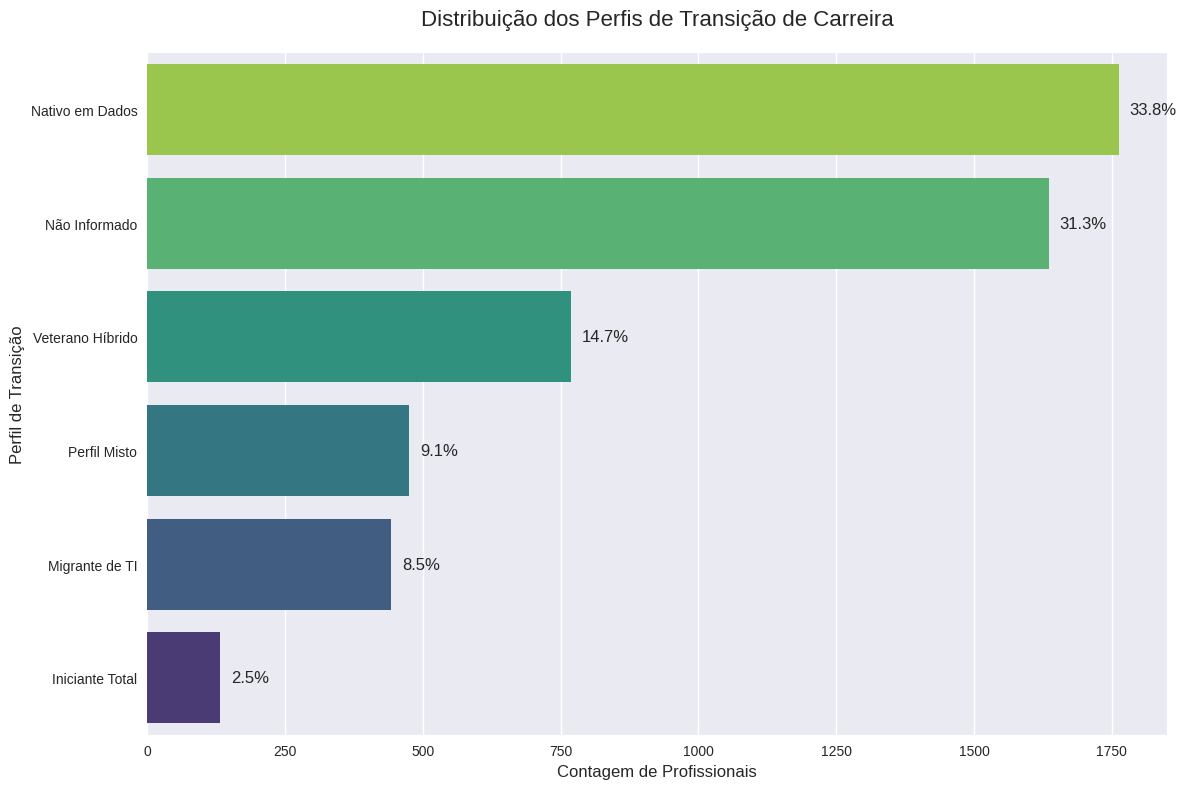

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Definindo a paleta de cores para manter a consistência
# Usei a paleta 'viridis_r' para inverter a ordem das cores, combinando com a frequência
custom_palette = sns.color_palette("viridis_r", 6)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 8))


sns.countplot(data=df, y='perfil_transicao', ax=ax, palette=custom_palette,
              order = df['perfil_transicao'].value_counts().index) 

# Adicionando os rótulos de percentual 
total = len(df['perfil_transicao'].dropna())
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%' 
    x = p.get_width() + 20 
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=12)

# Melhorando o visual
ax.set_title('Distribuição dos Perfis de Transição de Carreira', fontsize=16, pad=20)
ax.set_xlabel('Contagem de Profissionais', fontsize=12) 
ax.set_ylabel('Perfil de Transição', fontsize=12) 


sns.despine() 
plt.tight_layout()
plt.show()

**Conclusão da Análise:**

*   **Um Novo Paradigma na Origem dos Talentos:** Contrariando a percepção comum, a principal porta de entrada para a área de dados não é mais a migração de TI. A análise revela que o perfil "Nativo em Dados" é o mais representativo, com **33.8%** da amostra. Este dado aponta para um amadurecimento do ecossistema brasileiro, com uma nova geração de profissionais cuja formação e primeira experiência de carreira já ocorrem diretamente no campo de dados.

*   **A Complexidade da Jornada:** A segunda maior categoria, "Não Informado" (**31.3%**), é um insight em si. Sugere que um número expressivo de jornadas profissionais é tão multifacetado que não se enquadra em classificações simples, reforçando a necessidade de análises mais profundas para entender essas transições não-lineares.

*   **A Migração de TI como Rota de Nicho:** O perfil "Migrante de TI", embora relevante, representa apenas **8.5%** dos profissionais, indicando que, embora seja uma rota consolidada, não é mais a via dominante de acesso à carreira.

## 2. Conectando os Pontos: Análise Bivariada
### 2.1. A Origem Importa? O Impacto do Perfil de Transição na Remuneração

**Pergunta de Análise:** A experiência influencia o salário, mas a *origem* dessa experiência também tem peso? Profissionais que migraram de uma carreira sólida em TI ("Migrantes de TI") têm uma vantagem salarial sobre aqueles que entraram diretamente na área ("Nativos em Dados")? Um background "Híbrido" é mais valorizado financeiramente pelo mercado?

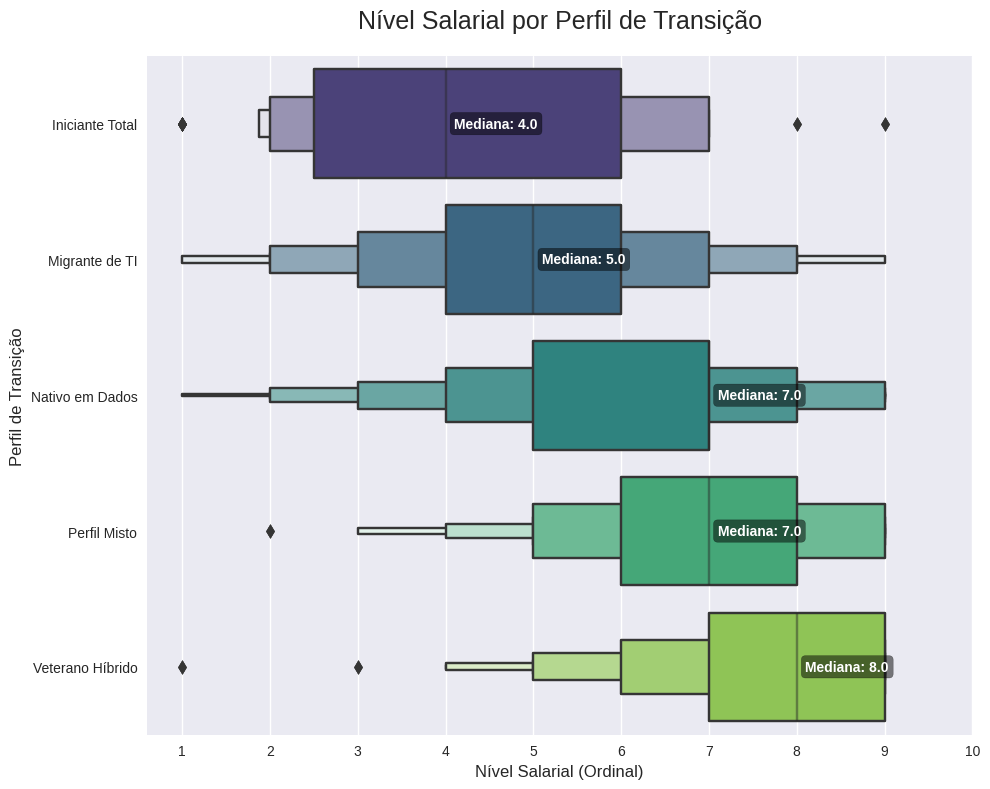

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- FILTRAR A CATEGORIA "NÃO INFORMADO" ---
df_filtrado = df[df['perfil_transicao'] != 'Não Informado'].copy()

# --- CALCULAR AS MEDIANAS PARA OS RÓTULOS ---
# Groupby para calcular a mediana do nível salarial para cada perfil
medianas = df_filtrado.groupby('perfil_transicao')['nivel_salarial'].median().sort_values()

# --- GERAR O GRÁFICO HORIZONTAL ---
plt.figure(figsize=(10, 8)) 

# Fazer o gráfico horizontal
ax = sns.boxenplot(data=df_filtrado, 
                   y='perfil_transicao', # Eixo Y tem as categorias
                   x='nivel_salarial',   # Eixo X tem os valores
                   palette='viridis',
                   order=medianas.index) # Usada a ordem calculada

# --- ADICIONAR OS RÓTULOS DE DADOS (MEDIANA) ---
# Iterar sobre cada categoria e sua mediana para adicionar o texto
for i, perfil in enumerate(medianas.index):
    mediana_valor = medianas[perfil]
    ax.text(mediana_valor + 0.1,  # Posição X (um pouco à direita da mediana)
            i,                     # Posição Y (no centro da categoria)
            f'Mediana: {mediana_valor:.1f}', # O texto a ser exibido
            color='white',
            weight='bold',
            ha='left',             # Alinhamento horizontal
            va='center',           # Alinhamento vertical
            bbox=dict(facecolor='black', alpha=0.5, pad=2, boxstyle='round,pad=0.3'))


# --- MELHORIAS VISUAIS ---
ax.set_title('Nível Salarial por Perfil de Transição', fontsize=18, pad=20)
ax.set_ylabel('Perfil de Transição', fontsize=12) # Eixo Y é Perfil
ax.set_xlabel('Nível Salarial (Ordinal)', fontsize=12) # Eixo X é Salário
ax.set_xticks(range(1, 11)) # Garante que todos os níveis salariais apareçam no eixo
sns.despine()
plt.tight_layout()
plt.show()

**Conclusão da Análise:**

> A análise da remuneração por perfil de transição revela uma nítida hierarquia de valorização no mercado, onde a natureza e a profundidade da experiência determinam não apenas o potencial de ganhos, mas também a variabilidade dos resultados em cada etapa da jornada.

*   **A Escada de Valorização do Mercado:** O gráfico desenha uma **clara** "escada" que representa como o mercado valoriza diferentes tipos de experiência. Não se trata de um caminho único, mas de uma nítida hierarquia de remuneração: a jornada começa com o **Iniciante Total** (mediana no Nível 4.0, faixa de R$3001 a 4000), progride com o **Migrante de TI** (mediana no Nível 5.0, faixa de 4001 a 5000), atinge um patamar de alta maturidade com os **Nativos em Dados** e **Perfis Mistos** (ambos com mediana no Nível 7.0, faixa de 6001 a 8000) e culmina no ápice com o **Veterano Híbrido** (mediana no Nível 8.0, faixa de 8001 a 12000).

*   **Nativos em Dados: O Espectro Completo da Carreira:** Este perfil é o mais revelador. Com uma mediana alta, ele também apresenta a maior amplitude no `boxenplot`. Isso indica que a categoria "Nativo em Dados" engloba todo o espectro da carreira: desde juniores em início de jornada (representados pela longa cauda à esquerda) até profissionais altamente remunerados e já consolidados (representados pela concentração de massa no Nível 7.0).

*   **Veterano Híbrido: Menor Risco, Maior Recompensa:** O perfil "Veterano Híbrido" não apenas possui a maior mediana, mas também a distribuição mais deslocada para a direita. Isso significa que mesmo os profissionais deste grupo com remuneração mais baixa (a base da distribuição) já se encontram em um patamar salarial superior ao profissional mediano que migrou de TI. Trata-se da trajetória de menor risco e maior recompensa financeira.

*   **Convergência na Maturidade:** É notável que os perfis "Nativo em Dados" e "Perfil Misto" compartilhem a mesma mediana salarial (7.0). Isso sugere que, uma vez que um profissional atinge um certo nível de maturidade e experiência diversificada, a rota de origem exata (seja "nativa" ou "mista") torna-se menos relevante para a remuneração mediana.
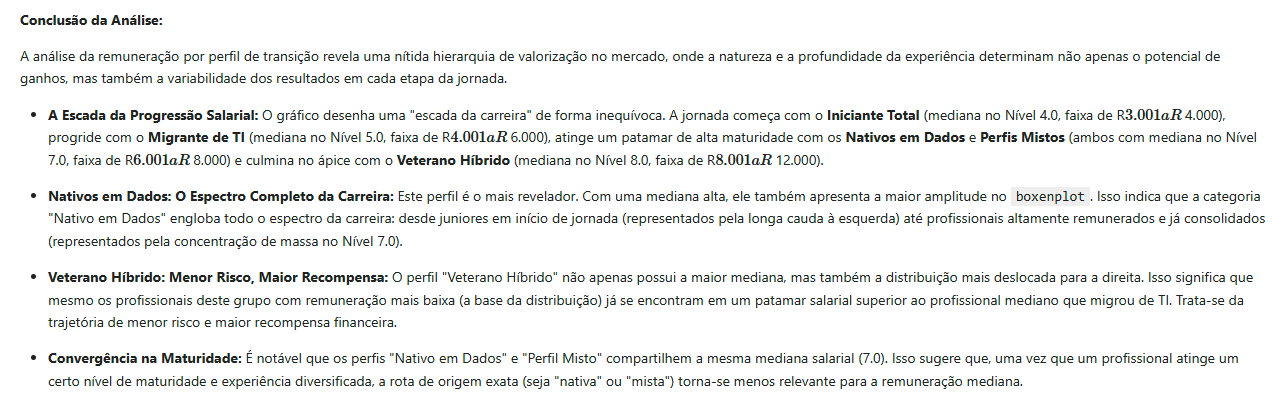
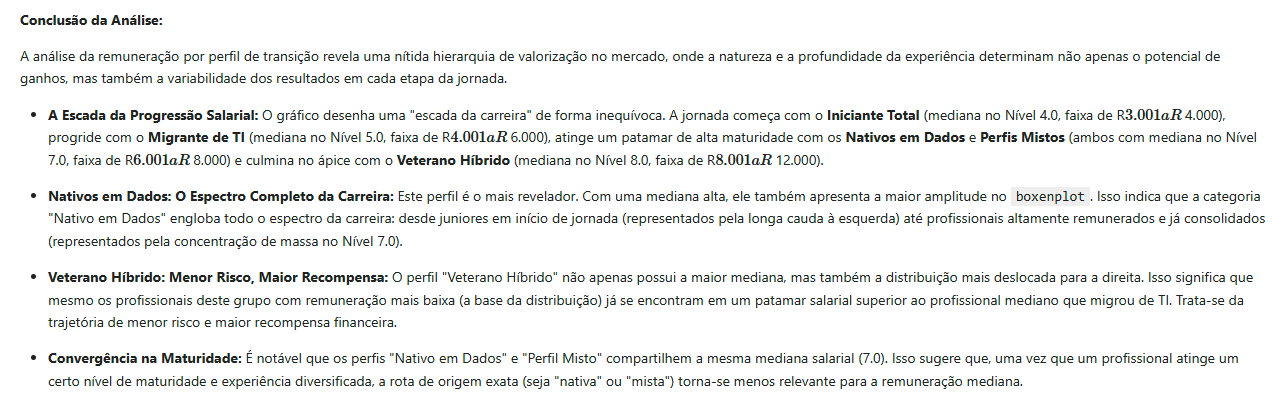

## 3. A Prova dos Nove: Validação de Hipóteses com Análise Multivariada

### 3.1. Caminhos e Destinos: O Perfil de Transição Influencia a Especialização do Cargo?

**Pergunta de Análise:** As diferentes jornadas de transição levam a especializações distintas dentro da área de dados? Existe uma tendência de que "Migrantes de TI" ocupem predominantemente cargos de Engenharia de Dados, enquanto "Nativos em Dados" se distribuem por funções de Análise ou Ciência de Dados? Este cruzamento busca entender se a bagagem profissional prévia direciona a escolha da carreira.

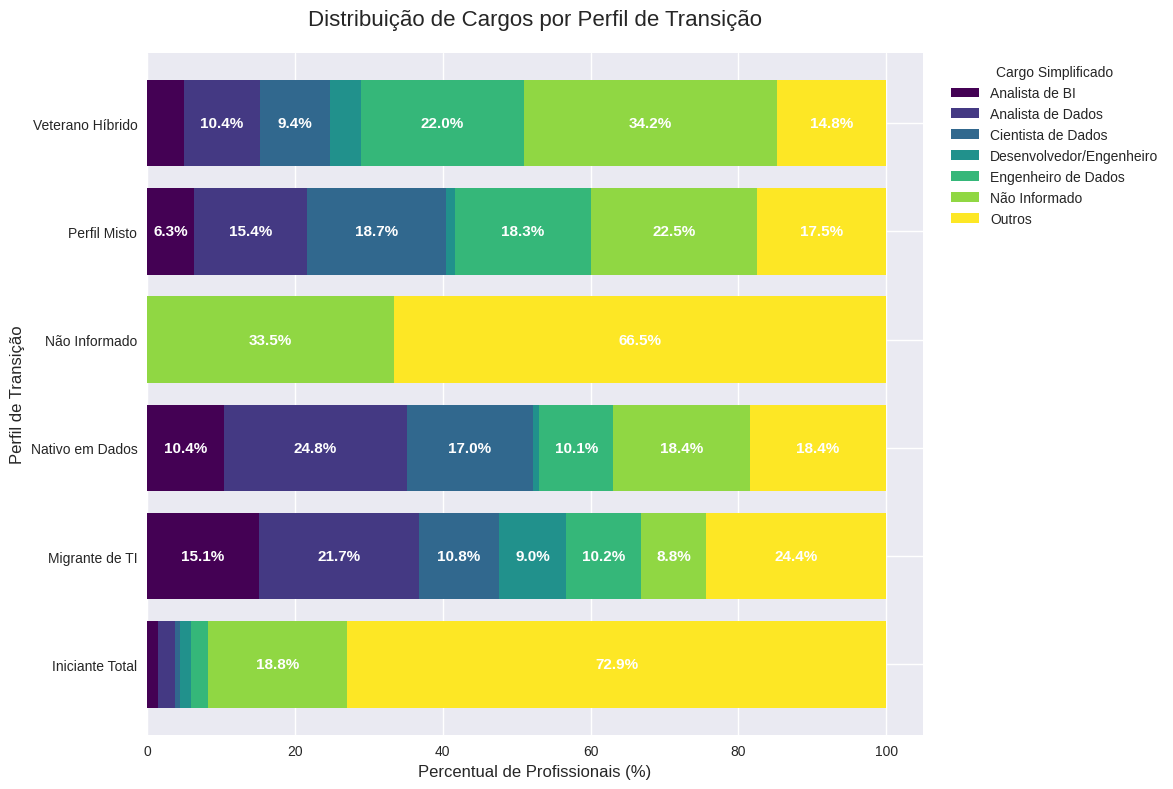

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criando a tabela de contingência normalizada
crosstab_norm = pd.crosstab(df['perfil_transicao'], 
                            df['cargo_simplificado'], 
                            normalize='index') * 100

# Plotando o gráfico de barras 100% empilhado
ax = crosstab_norm.plot(kind='barh', 
                        stacked=True, 
                        figsize=(14, 8), 
                        colormap='viridis', 
                        width=0.8)

# --- ADIÇÃO DOS RÓTULOS DE DADOS ---
# Este loop itera sobre cada conjunto de barras empilhadas (cada "container")
for c in ax.containers:
    # Cria uma lista de rótulos. O rótulo só aparece se o segmento for maior ou igual a 5%
    labels = [f'{v.get_width():.1f}%' if v.get_width() >= 5 else '' for v in c]
    
    # A função bar_label cuida de posicionar os rótulos no centro de cada segmento
    ax.bar_label(c, labels=labels, label_type='center', color='white', weight='bold', fontsize=11)

# Melhorias no visual
ax.set_title('Distribuição de Cargos por Perfil de Transição', fontsize=16, pad=20)
ax.set_xlabel('Percentual de Profissionais (%)', fontsize=12)
ax.set_ylabel('Perfil de Transição', fontsize=12)
ax.legend(title='Cargo Simplificado', bbox_to_anchor=(1.02, 1), loc='upper left')
sns.despine()

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

**Conclusão da Análise:**

*   **A Bagagem Profissional Direciona a Especialização:** A análise revela uma forte correlação entre o perfil de transição e o cargo ocupado. Fica claro que a experiência prévia direciona a especialização do profissional dentro da área de dados.

*   **Afinidade dos Migrantes de TI com Análise de Negócios:** O perfil "Migrante de TI" demonstra uma afinidade particular com as funções de "Analista de Dados" e "Analista de BI". Isso sugere que esses profissionais frequentemente alavancam sua experiência técnica prévia para atuar em posições que fazem a ponte direta entre os dados e as necessidades do negócio.

*   **Versatilidade dos Nativos em Dados:** Em contraste, os "Nativos em Dados" apresentam uma distribuição mais equilibrada entre os diferentes cargos, incluindo uma forte presença em "Ciência de Dados". Isso pode indicar uma formação mais generalista ou uma maior flexibilidade para se adaptar às diversas subáreas do ecossistema de dados.

*   **O Equilíbrio do Veterano Híbrido:** O perfil "Veterano Híbrido" se destaca por apresentar a distribuição mais equilibrada entre as três principais especialidades técnicas: Analista, Cientista e Engenheiro de Dados. Isso reforça sua caracterização como um profissional completo, com competências sólidas em múltiplas facetas da área de dados.

### 3.2. A Análise Definitiva: Cruzando Salário, Senioridade, Perfil e Cargo

**Pergunta de Análise:** Após analisar as variáveis em pares, a investigação final busca uma visão integrada. Como a dinâmica salarial de um "Cientista de Dados" Sênior que é "Nativo em Dados" se compara à de um "Engenheiro de Dados" com o mesmo nível de senioridade, mas que é "Migrante de TI"? Ao segmentar a análise por cargo, é possível descobrir nichos de alta remuneração e entender as nuances que governam a progressão de carreira em cada especialidade.

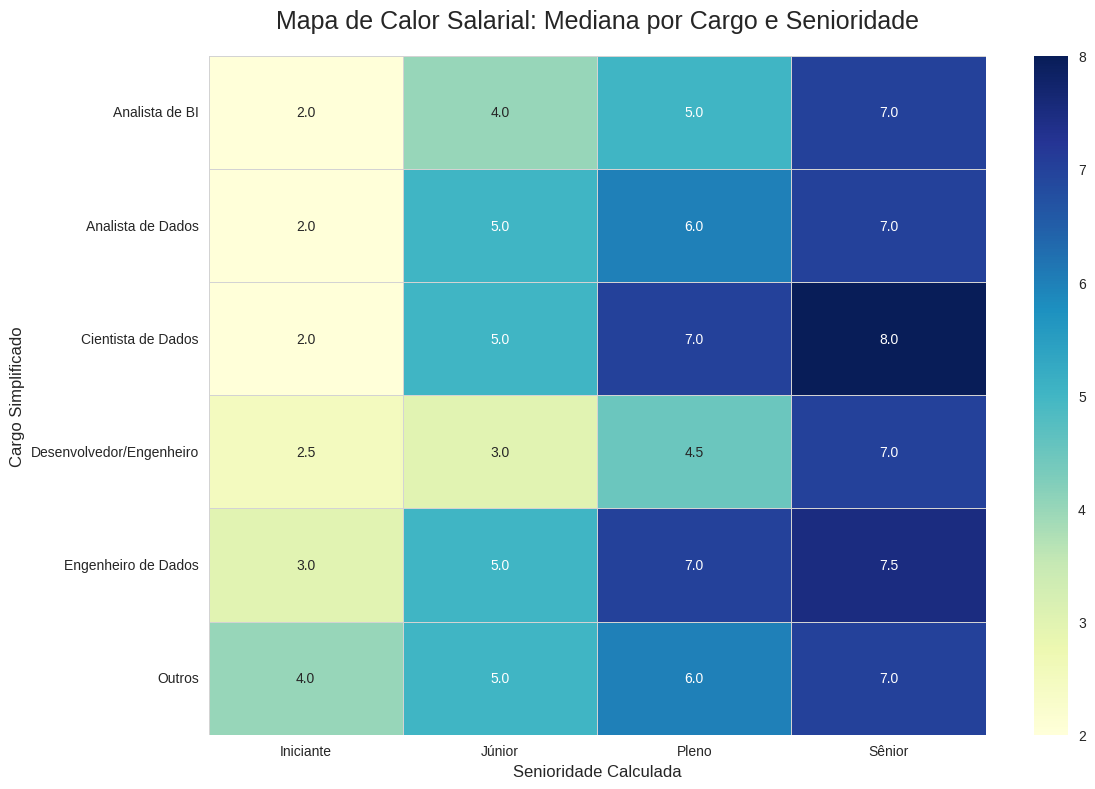

In [14]:


# FILTRAR AS CATEGORIAS "NÃO INFORMADO" 
# Criar um novo DataFrame que exclui as linhas onde o cargo OU a senioridade são "Não Informado"
df_heatmap_filtrado = df[
    (df['cargo_simplificado'] != 'Não Informado') & 
    (df['senioridade_calculada'] != 'Não Informado')
].copy()


# CRIAR A TABELA DINÂMICA COM OS DADOS FILTRADOS 
heatmap_data = pd.pivot_table(df_heatmap_filtrado,
                              values='nivel_salarial',
                              index='cargo_simplificado',
                              columns='senioridade_calculada',
                              aggfunc='median')

# REORDENAR AS COLUNAS SEM O "NÃO INFORMADO"
# A nova ordem agora contém apenas as senioridades relevantes
order_senioridade_filtrado = ['Iniciante', 'Júnior', 'Pleno', 'Sênior']
heatmap_data = heatmap_data.reindex(columns=order_senioridade_filtrado)


# PLOTAR O HEATMAP
plt.figure(figsize=(12, 8)) # Ajustar o tamanho para a nova matriz de dados
sns.heatmap(heatmap_data,
            annot=True,        # Mostra os valores numéricos nas células
            fmt=".1f",         # Formata os números para uma casa decimal
            cmap='YlGnBu',     # Paleta de cores (Yellow-Green-Blue)
            linewidths=.5,
            linecolor='lightgrey')

plt.title('Mapa de Calor Salarial: Mediana por Cargo e Senioridade', fontsize=18, pad=20)
plt.xlabel('Senioridade Calculada', fontsize=12)
plt.ylabel('Cargo Simplificado', fontsize=12)
plt.xticks(rotation=0) 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Conclusão da Análise:**

*   **O Vértice da Pirâmide: Cientista de Dados Sênior:** O mapa de calor aponta claramente para a combinação de **Cientista de Dados** e nível **Sênior** como o ponto de maior remuneração mediana (Nível 8.0), representando a faixa de **R$ 8.001 a 12.000**. Isso posiciona a ciência de dados no topo da hierarquia salarial para profissionais experientes na amostra analisada.

*   **Engenharia de Dados: Uma Aposta Sólida na Maturidade:** A carreira de **Engenheiro de Dados** se mostra extremamente robusta, alcançando o segundo maior patamar salarial no nível Sênior (Nível 7.5). Isso reforça a alta demanda e valorização de profissionais capazes de construir e manter a infraestrutura de dados.

*   **A Base Sólida da Análise:** Os cargos de **Analista de Dados** e **Analista de BI** demonstram uma progressão salarial consistente e sólida, culminando em um respeitável Nível 7.0 na senioridade. Eles formam a base essencial e bem remunerada do ecossistema de dados.

*   **Visualização da Progressão:** O principal insight do heatmap é mostrar de forma **clara e consistente** que, independentemente do cargo, a progressão de Júnior para Pleno e de Pleno para Sênior está **sempre** associada a um aumento significativo na mediana salarial, confirmando o valor da experiência acumulada em todas as especialidades.

## 🏔️ **ETAPA 5: O Destino da Jornada - Insights Acionáveis e Conclusões Finais**
Após mapear as rotas, os salários e as especializações, a etapa final desta análise busca sintetizar os aprendizados para responder à pergunta mais importante: **o que, de fato, define uma trajetória de sucesso na área de dados no Brasil?** Esta seção se aprofunda em fatores-chave como as habilidades técnicas e a progressão hierárquica, culminando em um resumo dos principais insights e recomendações práticas.

### 5.1 - As "Golden Skills": Quais Competências Técnicas Realmente Impactam o Salário?

**Pergunta de Análise:** A experiência e o cargo são determinantes para a remuneração, mas qual o peso das competências técnicas específicas? Saber Python, ter proficiência em Cloud ou dominar ferramentas de BI representa um aumento salarial real e mensurável, mesmo quando se comparam profissionais com o mesmo nível de senioridade? Esta análise busca isolar o "prêmio salarial" de cada skill para entender o que o mercado mais valoriza.

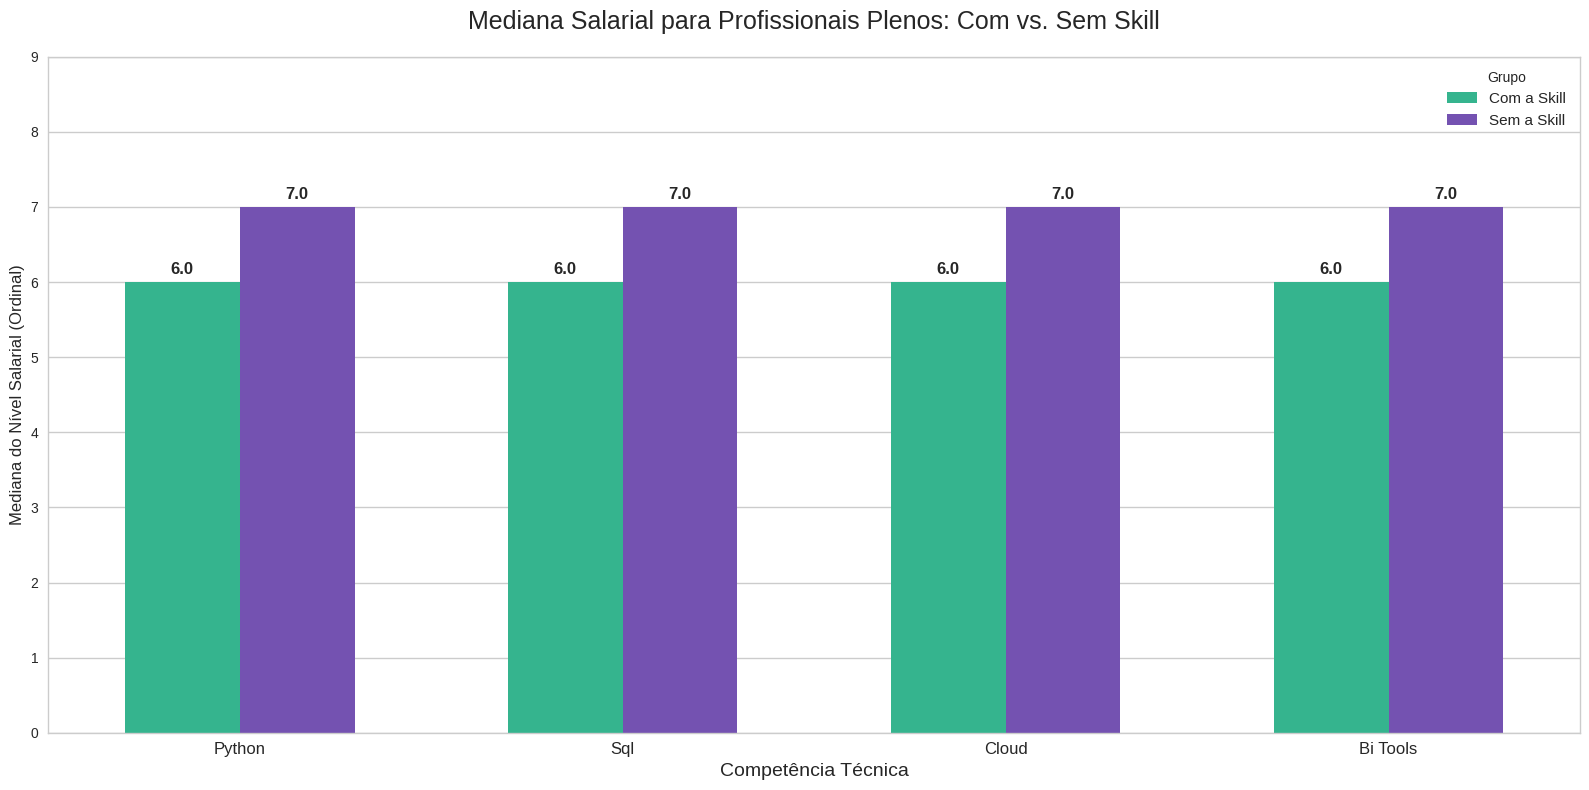

In [15]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Engenharia de Features - Criando as Flags de Skills ---.
df['tem_python'] = df['4.d.3_Python'].notna().astype(int)
df['tem_sql'] = df['4.d.1_SQL'].notna().astype(int)
cloud_cols = ['4.h.1_Amazon Web Services (AWS)', '4.h.2_Google Cloud (GCP)', '4.h.3_Azure (Microsoft)']
df['tem_cloud'] = df[cloud_cols].notna().any(axis=1).astype(int)
bi_cols = ['4.j.1_Microsoft PowerBI', '4.j.3_Tableau', '4.j.7_Looker']
df['tem_bi_tools'] = df[bi_cols].notna().any(axis=1).astype(int)


# --- Cálculo da Mediana Salarial para o Nível PLENO ---
df_plenos = df[df['senioridade_calculada'] == 'Pleno'].copy()
skills_list = ['tem_python', 'tem_sql', 'tem_cloud', 'tem_bi_tools']
skill_premiums = []
for skill in skills_list:
    median_with = df_plenos[df_plenos[skill] == 1]['nivel_salarial'].median()
    median_without = df_plenos[df_plenos[skill] == 0]['nivel_salarial'].median()
    skill_premiums.append({
        'Skill': skill.replace('tem_', '').replace('_', ' ').title(),
        'Sem a Skill': median_without,
        'Com a Skill': median_with
    })
df_premiums = pd.DataFrame(skill_premiums).dropna()


### --- Transformando os dados --- ###
df_plot = df_premiums.melt(id_vars='Skill', 
                           value_vars=['Com a Skill', 'Sem a Skill'],
                           var_name='Grupo', 
                           value_name='Mediana Salarial')


# --- Visualização com Gráfico de Barras Agrupadas ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(data=df_plot, 
            x='Skill', 
            y='Mediana Salarial', 
            hue='Grupo', 
            palette={'Com a Skill': '#20c997', 'Sem a Skill': '#6f42c1'},
            ax=ax,
            width=0.6)

# Adicionando os rótulos de dados
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=12, weight='bold')

# Melhorias visuais
ax.set_title('Mediana Salarial para Profissionais Plenos: Com vs. Sem Skill', fontsize=18, pad=20)
ax.set_xlabel('Competência Técnica', fontsize=14)
ax.set_ylabel('Mediana do Nível Salarial (Ordinal)', fontsize=12)
ax.legend(title='Grupo', fontsize=11)
ax.set_ylim(0, 9)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

**Conclusão da Análise:**

*   **Um Paradoxo Salarial Revelador:** A análise do impacto das skills na remuneração de profissionais Plenos trouxe um resultado contraintuitivo e extremamente revelador. Contrariando a hipótese inicial, para todas as competências analisadas (BI, Cloud, SQL e Python), a mediana salarial do grupo que **não** reportou o uso da skill foi superior à do grupo que a utiliza.

*   **Interpretando o "Prêmio Negativo":** Este resultado não sugere que o conhecimento técnico seja desvalorizado. Pelo contrário, a interpretação mais provável aponta para uma dinâmica estrutural da carreira: no nível Pleno, os profissionais mais bem remunerados podem ser aqueles que já estão transcendendo a execução técnica do dia a dia. Eles podem estar em posições de liderança de projetos, gestão de equipes ou arquitetura de soluções, onde, embora o conhecimento técnico seja a base, o impacto (e a remuneração) vem da responsabilidade estratégica, e não do uso direto e diário da ferramenta.

*   **O Próximo Passo na Carreira Plena:** A análise sugere que, para um profissional de nível Pleno, o caminho para o próximo salto salarial pode não ser apenas aprofundar-se em mais uma tecnologia, mas sim começar a desenvolver competências de liderança, gestão e visão de negócio. As "Golden Skills", nesse estágio, podem ser menos sobre "o que" se usa e mais sobre "como" se aplica o conhecimento para gerar valor estratégico.

### 5.2 - A Escada da Carreira: Como a Estrutura de Cargos se Transforma com a Senioridade?

**Pergunta de Análise:** A jornada de um profissional de dados não é estática. Conforme a experiência aumenta, as responsabilidades e os títulos dos cargos tendem a mudar. Mas como essa transformação acontece na prática? A análise a seguir investiga a estrutura de cargos em cada nível de senioridade para visualizar a "escada da carreira": há uma migração de papéis mais analíticos para posições de engenharia ou gestão à medida que os profissionais se tornam mais sêniores?

In [16]:


# CÉLULA 1: PREPARAÇÃO DA FEATURE 'cargo_simplificado_v2'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Executando a preparação dos dados de cargo...")

def simplificar_cargo_com_gestao(cargo):
    """
    Função aprimorada que classifica os cargos em categorias padronizadas,
    dando prioridade à identificação de papéis de gestão.
    """
    if pd.isna(cargo):
        return 'Não Informado'
    
    cargo_str = str(cargo).lower()
    
    # Palavras-chave para identificar cargos de gestão
    gestao_keywords = ['manager', 'leader', 'head', 'coordenador', 'gestor', 'liderança', 'lider']
    if any(keyword in cargo_str for keyword in gestao_keywords):
        return 'Gestão/Liderança'
    
    if 'analista de dados' in cargo_str or 'data analyst' in cargo_str:
        return 'Analista de Dados'
    elif 'cientista de dados' in cargo_str or 'data scientist' in cargo_str:
        return 'Cientista de Dados'
    elif 'engenheiro de dados' in cargo_str or 'data engineer' in cargo_str:
        return 'Engenheiro de Dados'
    elif 'analista de bi' in cargo_str or 'bi analyst' in cargo_str:
        return 'Analista de BI'
    elif 'desenvolvedor' in cargo_str or 'engenheiro de software' in cargo_str:
        return 'Desenvolvedor/Engenheiro'
    else:
        return 'Outros'

# Aplica a função para criar a nova coluna de cargo simplificado
df['cargo_simplificado_v2'] = df['cargo_atual'].apply(simplificar_cargo_com_gestao)

print("Coluna 'cargo_simplificado_v2' criada e pronta para uso.")


Executando a preparação dos dados de cargo...
Coluna 'cargo_simplificado_v2' criada e pronta para uso.


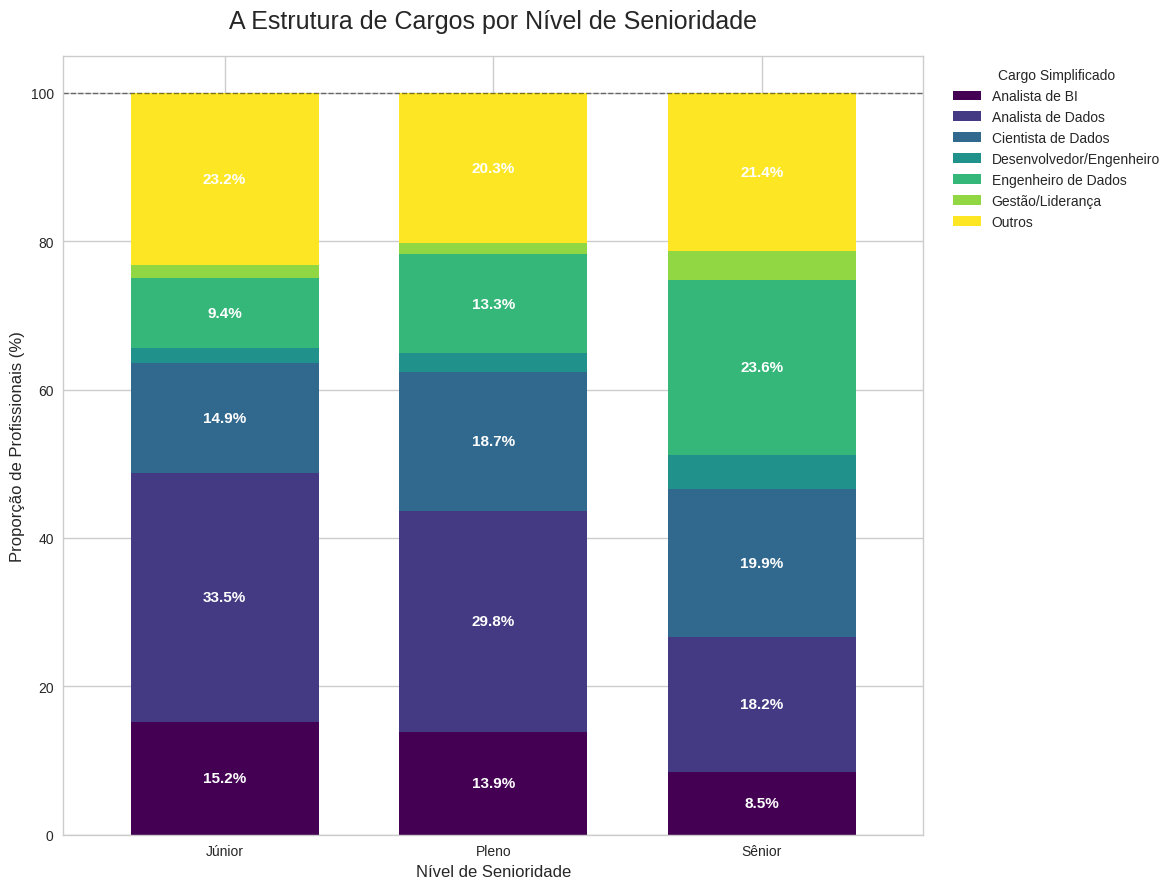

In [17]:


# CÉLULA 2: VISUALIZAÇÃO DA ESTRUTURA DE CARGOS POR SENIORIDADE

# --- Preparando os dados para a plotagem ---
# Filtra os dados para focar nos níveis de progressão de carreira
df_progressao = df[
    (df['senioridade_calculada'].isin(['Júnior', 'Pleno', 'Sênior'])) &
    (df['cargo_simplificado_v2'] != 'Não Informado')
].copy()

# Cria a tabela de contingência, normalizada para mostrar proporções (100%)
crosstab_norm = pd.crosstab(index=df_progressao['senioridade_calculada'], 
                            columns=df_progressao['cargo_simplificado_v2'], 
                            normalize='index') * 100

# Reordena o índice para garantir a ordem lógica no gráfico (Júnior -> Pleno -> Sênior)
order_senioridade = ['Júnior', 'Pleno', 'Sênior']
crosstab_norm = crosstab_norm.reindex(order_senioridade)

# --- Visualização ---
# Define o estilo para o gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

# Plota o gráfico de barras 100% empilhado
crosstab_norm.plot(kind='bar', 
                   stacked=True, 
                   ax=ax,
                   colormap='viridis',
                   width=0.7)

# --- Adicionando rótulos de dados ---
for container in ax.containers:
    # Mostra o rótulo apenas se a fatia for de 5% ou mais
    labels = [f'{w:.1f}%' if (w := v.get_height()) >= 5 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', color='white', weight='bold', fontsize=11)

# --- Melhorias visuais ---
ax.set_title('A Estrutura de Cargos por Nível de Senioridade', fontsize=18, pad=20)
ax.set_xlabel('Nível de Senioridade', fontsize=12)
ax.set_ylabel('Proporção de Profissionais (%)', fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Cargo Simplificado', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.axhline(100, color='black', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

> **Observação sobre a Categoria "Gestão/Liderança":** A nova categoria de cargos foi criada para agrupar títulos como *manager, head, coordenador* e *líder*. Na amostra total, a distribuição dos cargos simplificados foi a seguinte:

> *   **Outros:** 1738
> *   **Não Informado:** 1306
> *   **Analista de Dados:** 689
> *   **Cientista de Dados:** 509
> *   **Engenheiro de Dados:** 482
> *   **Analista de BI:** 320
> *   **Desenvolvedor/Engenheiro:** 96
> *   **Gestão/Liderança:** 77

**Conclusão da Análise: Da Base Analítica à Especialização Sênior**

A análise da estrutura de cargos por senioridade revela um mapa dinâmico da progressão de carreira na área de dados, mostrando claramente as "portas de entrada" e os "destinos" mais comuns à medida que os profissionais ganham experiência.

*   **O Ponto de Partida Analítico:** Os cargos de **Analista de Dados** e **Analista de BI** funcionam como as principais portas de entrada no mercado, representando quase metade (48.7%) de todas as posições de nível Júnior. No entanto, a proporção desses cargos diminui consistentemente nos níveis mais altos, indicando que são papéis fundamentais de base, mas que frequentemente levam a outras especializações.

*   **A Ascensão do Engenheiro de Dados:** A trajetória mais notável é a da **Engenharia de Dados**. Saindo de uma representação modesta de 9.4% no nível Júnior, essa especialidade cresce exponencialmente, tornando-se a maior fatia técnica entre os profissionais Sêniores, com **23.6%**. Este crescimento explosivo sublinha a importância crítica da infraestrutura, arquitetura e pipelines de dados no topo da carreira técnica.

*   **A Consolidação do Cientista de Dados:** A **Ciência de Dados** também se mostra um caminho de progressão claro, crescendo de 14.9% no nível Júnior para se consolidar como a segunda maior especialidade técnica Sênior (19.9%).

*   **O Caminho para a Liderança:** Embora a categoria **Gestão/Liderança** não seja a maior fatia entre os Sêniores, seu crescimento a partir do nível Pleno indica um caminho de carreira alternativo e importante para aqueles que buscam migrar da execução técnica para a responsabilidade estratégica.

Em suma, a carreira em dados no Brasil parece começar com uma base analítica forte, mas a maturidade profissional leva a uma bifurcação clara: uma **especialização profunda em áreas de alta complexidade como Engenharia e Ciência de Dados, ou uma transição para papéis de liderança.**

# 🏁 ETAPA FINAL: Conclusões e Recomendações Estratégicas

Após uma imersão profunda nos dados da pesquisa State of Data 2024, esta análise conseguiu mapear as complexas e dinâmicas jornadas dos profissionais de dados no Brasil. Mais do que apenas números e gráficos, os resultados pintam um retrato vívido de um mercado em plena transformação, com novos paradigmas de entrada, progressão e valorização profissional. Esta seção final consolida os principais achados e os traduz em recomendações práticas para profissionais, empresas e para o futuro da área.

---

### **Resumo dos Principais Achados**

A jornada pelos dados revelou insights que, em muitos casos, desafiam o senso comum e oferecem uma nova perspectiva sobre o ecossistema de dados brasileiro:

*   **O Novo Paradigma da Porta de Entrada:** Contrariando a crença popular, a principal via de acesso à área de dados não é mais a migração de TI. A análise mostrou que o perfil **"Nativo em Dados"** é o mais comum (33.8%), indicando um amadurecimento do mercado com uma geração que já inicia sua carreira neste campo.

*   **O Valor da Experiência Híbrida:** A análise salarial foi inequívoca: profissionais com experiência consolidada tanto em TI quanto em Dados (o perfil **"Veterano Híbrido"**) alcançam os maiores patamares de remuneração, provando que o mercado atribui um prêmio significativo à combinação de competências.

*   **A Ascensão da Engenharia de Dados:** A progressão de carreira demonstrou que, enquanto os cargos de Analista são a base da pirâmide, a especialização em **Engenharia de Dados** é a que mais cresce em proporção nos níveis sêniores, tornando-se a principal função técnica entre os profissionais mais experientes.

*   **O Paradoxo das "Golden Skills":** De forma surpreendente, a análise indicou que, para profissionais de nível Pleno, o simples fato de reportar o uso diário de ferramentas como Python ou SQL não se correlaciona com salários mais altos. A interpretação mais provável é que os Plenos mais bem remunerados já estão em transição para papéis de **liderança técnica ou gestão**, onde o impacto estratégico supera a execução diária.

---

### **Recomendações para Profissionais**

Baseado nas evidências, algumas direções estratégicas podem ser traçadas para quem busca construir uma carreira de sucesso na área:

*   **Para Iniciantes ("Nativos" e "Iniciantes Totais"):** Construa uma base analítica sólida. Os cargos de Analista de Dados e BI são as portas de entrada mais comuns. Domine os fundamentos, mas já planeje sua próxima especialização, seja em Engenharia, Ciência de Dados ou outra área de nicho.

*   **Para Profissionais em Transição ("Migrantes de TI"):** Sua bagagem técnica é um ativo valioso. Alavanque-a para mirar em posições de Engenharia de Dados ou BI, onde sua experiência prévia é um diferencial competitivo claro.

*   **Para Profissionais Plenos Buscando o Próximo Nível:** A análise sugere que o salto para o nível Sênior envolve mais do que aprofundar a técnica. Comece a buscar responsabilidades que envolvam visão de projeto, arquitetura de soluções e mentoria de outros profissionais. Desenvolver competências de comunicação e liderança é fundamental.

*   **Para Todos:** Aspire a ser um "Híbrido". Independentemente da sua origem, buscar uma segunda ou terceira competência adjacente (seja em negócios, produto, ou outra área da tecnologia) é o caminho mais claro para a diferenciação e para os maiores salários no longo prazo.

---

### **Recomendações para Empresas e Líderes**

A dinâmica do mercado de talentos em dados exige que as organizações também adaptem suas estratégias:

*   **Reavaliem os Perfis de Contratação:** As empresas devem abandonar a visão de que o talento em dados vem exclusivamente de backgrounds em TI ou Computação. É preciso criar processos seletivos e programas de trainee capazes de identificar e desenvolver o potencial dos "Nativos em Dados".

*   **Valorizem e Incentivem a Experiência Híbrida:** Reconheçam formalmente que profissionais que combinam diferentes domínios de conhecimento são aceleradores de valor. Crie planos de carreira que permitam e incentivem a rotação entre áreas (ex: de Engenharia para Ciência de Dados, ou de Dados para Produto).

*   **Invistam no Desenvolvimento de "Plenos":** O nível Pleno é um ponto de inflexão crítico. As empresas devem criar oportunidades para que esses profissionais desenvolvam não apenas skills técnicas, mas também competências de liderança e gestão, preparando-os para assumir posições estratégicas no futuro.



## REFERÊNCIAS

- [Estudo da Brasscom aponta demanda de 797 mil profissionais de tecnologia até 2025](https://brasscom.org.br/estudo-da-brasscom-aponta-demanda-de-797-mil-profissionais-de-tecnologia-ate-2025/)